# JuliaでBit全探索を書く時にはdigitsを使うと便利。
> Julia言語でBit全探索を実装します。

- toc: true 
- badges: true
- comments: true
- categories: [AtCoder]
- image: images/chart-preview.png


# digitsについて

digits(a, base=b, pad=c)は、10進数の整数aをc桁のb進数に変換した配列を返します。


例えば,

In [63]:
n = 20
println(digits(n, base=3, pad=10))

[2, 0, 2, 0, 0, 0, 0, 0, 0, 0]


これを利用して、Bit全探索を用意に実装できます。

(Bit全探索については、https://algo-logic.info/rec-bit-search/ がわかりやすいのでおすすめです)

具体的には以下のようなコードです。

In [1]:
N = 4
for i in 0:2^N - 1
    pettern = digits(i, base=2, pad=N)
    println(pettern)
end

[0, 0, 0, 0]
[1, 0, 0, 0]
[0, 1, 0, 0]
[1, 1, 0, 0]
[0, 0, 1, 0]
[1, 0, 1, 0]
[0, 1, 1, 0]
[1, 1, 1, 0]
[0, 0, 0, 1]
[1, 0, 0, 1]
[0, 1, 0, 1]
[1, 1, 0, 1]
[0, 0, 1, 1]
[1, 0, 1, 1]
[0, 1, 1, 1]
[1, 1, 1, 1]


あとはこの各パターンについて

`1 -> True`,
`0 -> False`

と見做して処理を行えば良いです。具体的に問題を解いてみます。


今回は, bit全探索を用いて部分和問題を解いてみます。

## 　部分和問題
部分和問題とは、
n 個の整数 a1,...,an からなる配列Aと, 整数 S が与えられるので、この中からいくつか(0個でも良い)を選んで、総和をAとすることができるかを判定する問題です。

nが小さい時は、bit全探索を用いることで実用的な速度で解くことができます。

In [2]:
N = 3
A = rand(1:10, N) 
S = rand(1:30)
# 簡単のためにAを1~10にしています

15

この記事で最初に解説したように, digitsを用いて全てのパターンを列挙します。

In [3]:
for i in 0:2^N - 1
    pettern = digits(i, base=2, pad=N)
    println(pettern)
end

[0, 0, 0]
[1, 0, 0]
[0, 1, 0]
[1, 1, 0]
[0, 0, 1]
[1, 0, 1]
[0, 1, 1]
[1, 1, 1]


ここで0をfalse(つまりそれを選択しない), 1をtrue(それを選択する)とみなした時、

そのパターンを表す配列をPとすると、

dot(A, P)と表すことができます。

(ベクトルの内積の公式(???)を思い出してください.

$$
dot(A, P) = (A_1 * P_1 + A_2 * P_2  + ... + A_N * P_N)
$$

なので、$P_i = 1$  を満たす全ての $A_i$ の総和が得られることがわかります)

したがって、部分和問題は次のようなコードで解けます。

とてもシンプルですね！

In [1]:
using LinearAlgebra

function solve(N, A, S)
    for i in 0:2^N - 1
        P = digits(i, base=2, pad=N)
        if dot(A, P) == S
            return "OK"
        end
    end
    return "NO"
end

solve (generic function with 1 method)

In [60]:
N = 3
A = rand(1:10, N) 
S = rand(1:30)

@show N
@show A
@show S

solve(N, A, S)

N = 3
A = [6, 2, 2]
S = 10


"OK"

さて、for loopの部分を見るとわかる通り、計算量はO(2^N)です。

そのため、Nが大きくなると計算時間がすごいことになります。実験してみます。

In [35]:
using Plots; gr()
using BenchmarkTools

In [25]:
# 最悪の計算量が知りたいので、絶対に「"No"」になるようなケースについて調べます。

function benchmark(N)
    times = zeros(N)
    S = 1
    for i in 1:N
        A = zeros(Int, i)
        benchmark = @benchmark solve($i, $A, $S)
        times[i] = mean(benchmark.times)
    end
    return times
end

benchmark (generic function with 1 method)

In [51]:
result = benchmark(25)

25-element Array{Float64,1}:
    133.6751464516129
    282.26004030172413
    594.3421730964468
   1192.9887933333332
   2418.8981
   4895.265942857142
  10310.882833333333
  21544.9604
  44802.3756
  90484.843
 191496.0094
 389037.5917
 822644.0528139957
      1.664166324108036e6
      3.659920297653959e6
      6.8240938715846995e6
      1.4020800481792716e7
      2.8781317189655174e7
      6.115847646341463e7
      1.2633562755e8
      2.6573442336842105e8
      5.402017053e8
      1.0789861962e9
      2.296732613e9
      4.4426158345e9

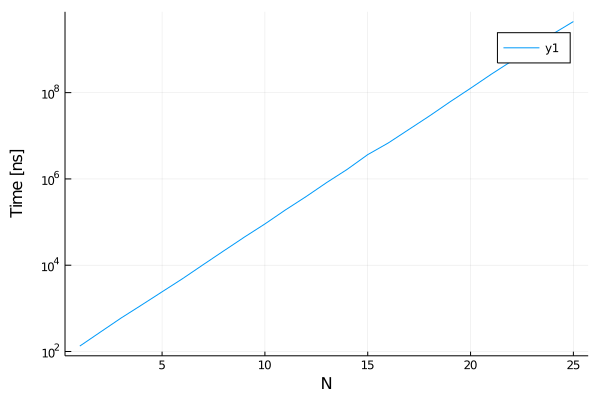

In [52]:
plot(result,  yaxis=:log)
xlabel!("N")
ylabel!("Time [ns]")

お手本のような指数関数ありがとうございます。Nが大きくなるにつれ計算量も爆発的に大きくなるので、使う時は気をつけましょう。